# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Nisha
##### **Team Member 2 -**Praneeth

# **Project Summary -**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [156]:
# Import Libraries\
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
# Load Dataset
Data=pd.read_csv('/content/drive/MyDrive/Almabetter/ML Regression/SeoulBikeData.csv',encoding= 'unicode_escape')

### Dataset First View

In [159]:
# Dataset First Look
Data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [160]:
# Dataset Rows & Columns count
Data.shape

(8760, 14)

### Dataset Information

In [161]:
# Dataset Info
Data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [162]:
  Data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#### Duplicate Values

In [163]:
# Dataset Duplicate Value Count
Data.duplicated().sum()

0

#### Missing Values/Null Values

In [164]:
# Missing Values/Null Values Count
Data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

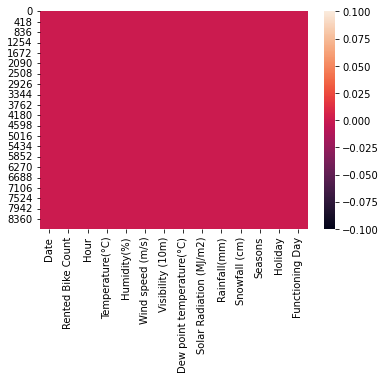

In [165]:
# Visualizing the missing values
sns.heatmap(Data.isnull())

### What did you know about your dataset?

From the dataset we got to know that


1.   Categorical Features are ['Seasons,'Holiday','FunctioningDay','Hour']
2.   Continoues features are ['Rented Bike Count','Temperature','Humidity','Visibility','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall','Snowfall']

3. We need to change the feature Date type from object to datetime

4. There are no missing values in the Dataset
5. We need to rename the column names Temperature(°C),Humidity(%)
,Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)





## ***2. Understanding Your Variables***

In [166]:
# Dataset Columns
Data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [167]:
# Dataset Describe
Data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

1. The Features **Rented Bike Count,Rainfall,Snowfall** might have outlier because of the difference between the Quantile 3 and Max is huge.
    *   For Rented Bike Count Q3(75%) value is 1065 and Max is 3556.
    *   For Rainfall and Snowfall the value till Q3 is 0 but the max is 35 and 8.8
2. For Visibility the Max value  and Q3 value is same(2000) 

### Check Unique Values for each variable.

In [168]:
# Check Unique Values for each variable.
for i in Data.columns:
  print(i,"=",Data[i].unique())

Date = ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018'
 '1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [169]:
# Write your code to make your dataset analysis ready.
# Convert Date object into datetime

Data['Date']=pd.to_datetime(Data['Date'], infer_datetime_format=True)
# Create Month Feature from the Date
Data['Day']=Data['Date'].dt.day
Data['Month']=Data['Date'].dt.month
Data['Year']=Data['Date'].dt.year
Data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [170]:
# Renaming the Feature Names
new_column_names={'Rented Bike Count':'Rented_Bike_Count',
                  'Temperature(°C)':'Temperature',
                  'Humidity(%)':'Humidity',
                  'Wind speed (m/s)':'Wind_speed',
                  'Visibility (10m)':'Visibitlity', 
                  'Dew point temperature(°C)':'Dew_point_temperature',
                  'Solar Radiation (MJ/m2)':'Solar_Radiation', 
                  'Rainfall(mm)':'Rainfall', 
                  'Snowfall (cm)':'Snowfall',
                  'Functioning Day':'Functioning_Day'
}
Data.rename(columns=new_column_names,inplace=True)
Data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibitlity,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [171]:
Categorical=['Hour','Seasons','Holiday','Functioning_Day','Month','Day','Year']
Continoues=['Rented_Bike_Count','Temperature','Humidity','Wind_speed','Visibitlity','Dew_point_temperature','Solar_Radiation',
           'Rainfall','Snowfall']


#### Chart - 1

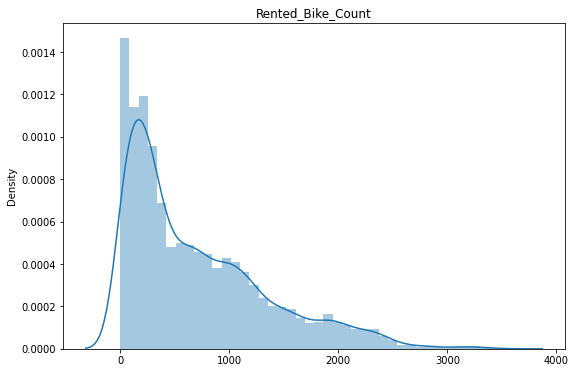

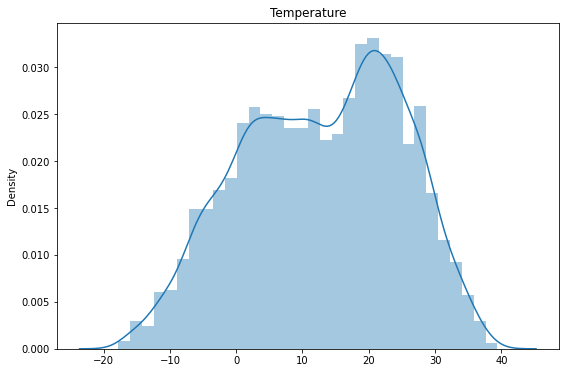

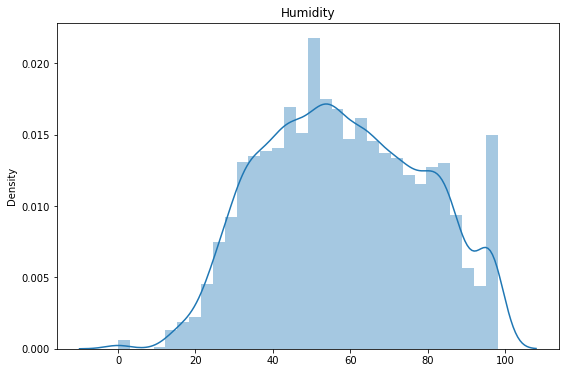

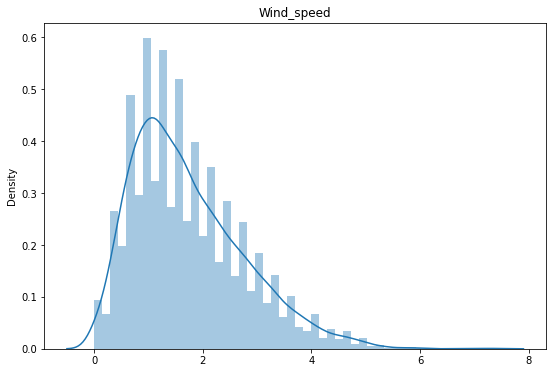

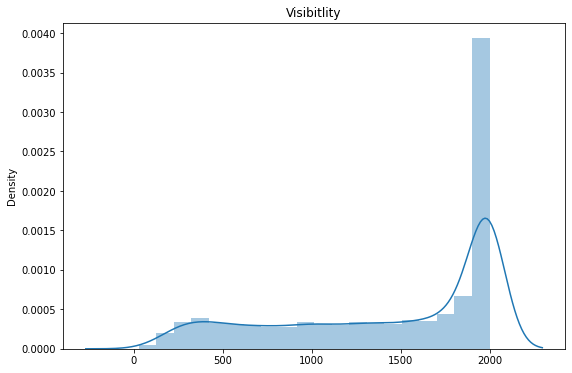

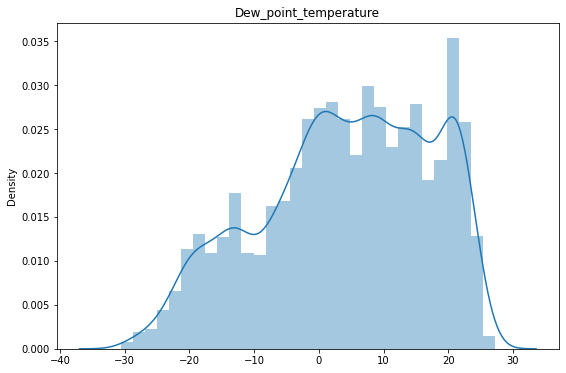

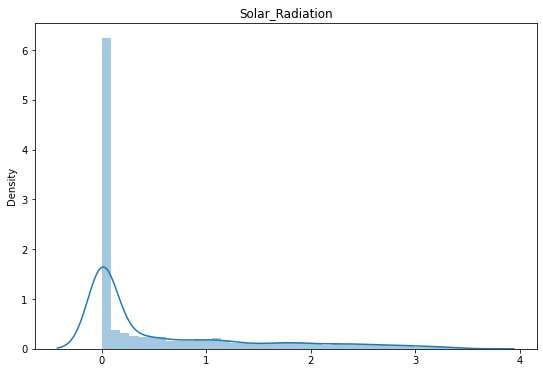

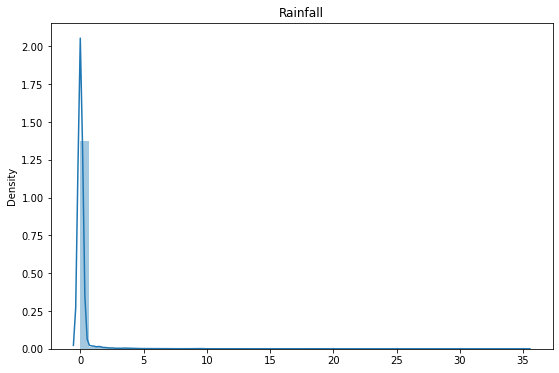

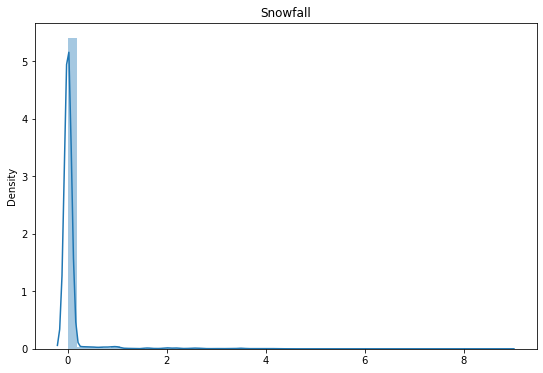

In [172]:
# Chart - 1 visualization code
import warnings
warnings.filterwarnings('ignore')

for col in Continoues:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.distplot(x=Data[col]).set(title=col)



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

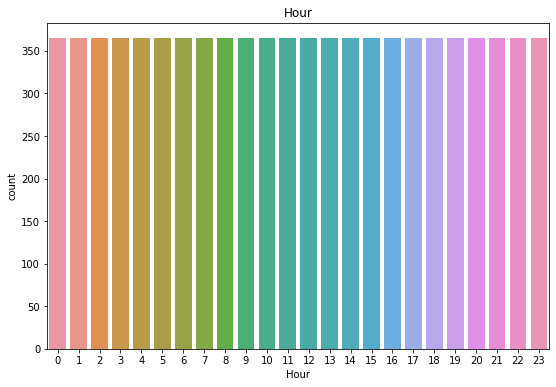

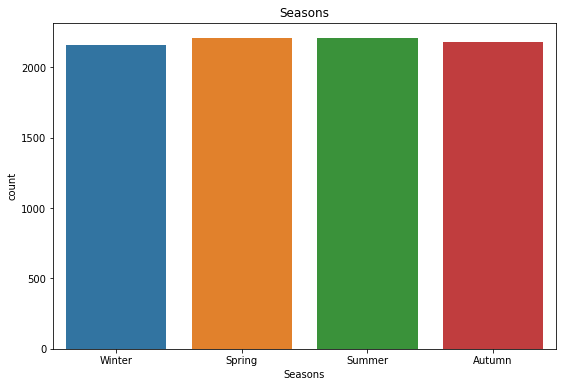

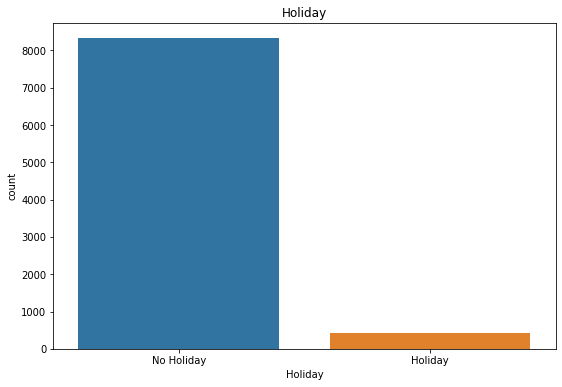

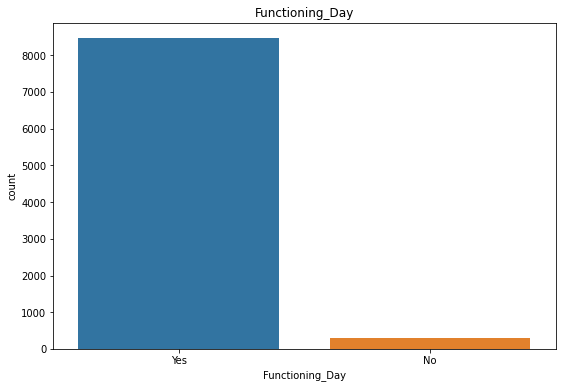

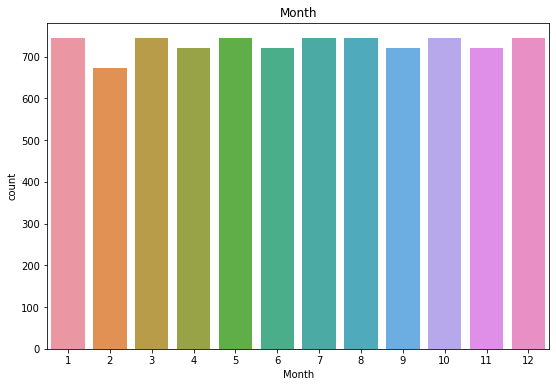

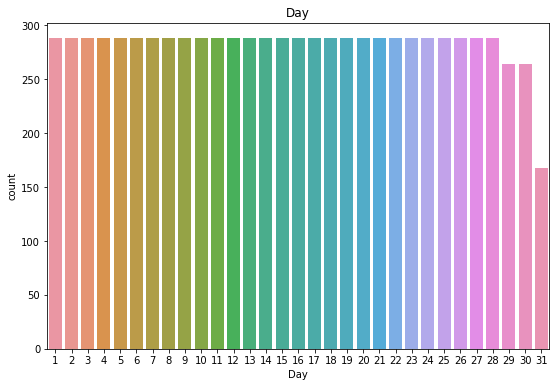

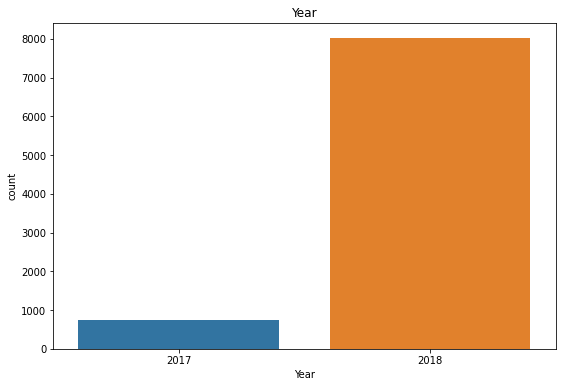

In [173]:
# Chart - 2 visualization code
for col in Categorical:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.countplot(data=Data,x=col).set(title=col)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Axes: xlabel='Hour', ylabel='Rented_Bike_Count'>

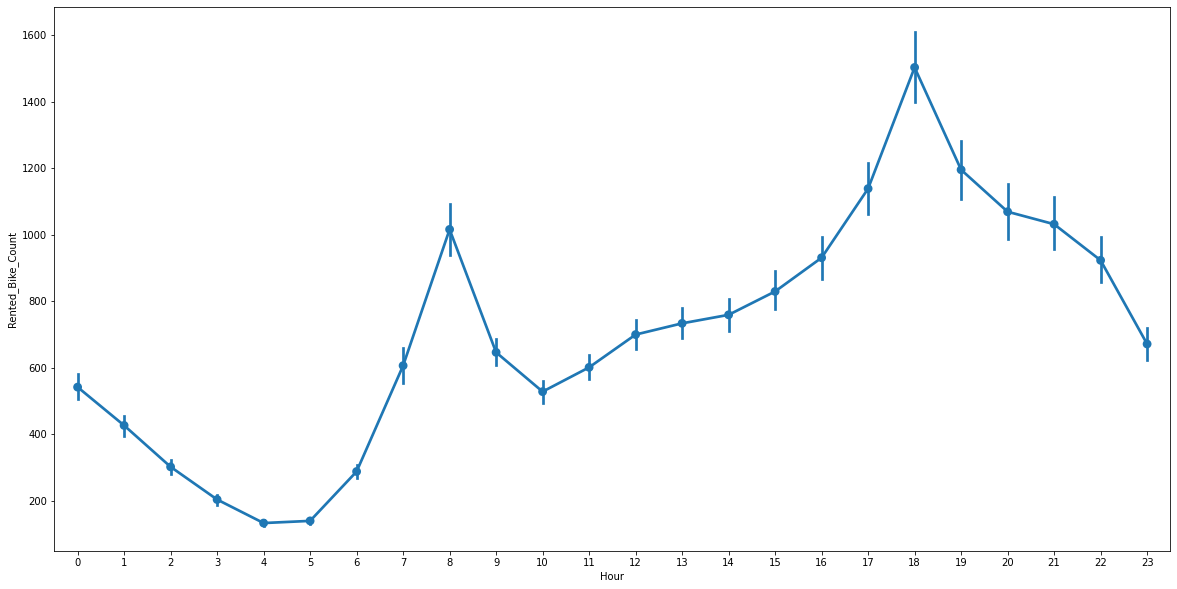

In [174]:

plt.figure(figsize=(20,10))
sns.pointplot(x=Data['Hour'],y=Data['Rented_Bike_Count'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

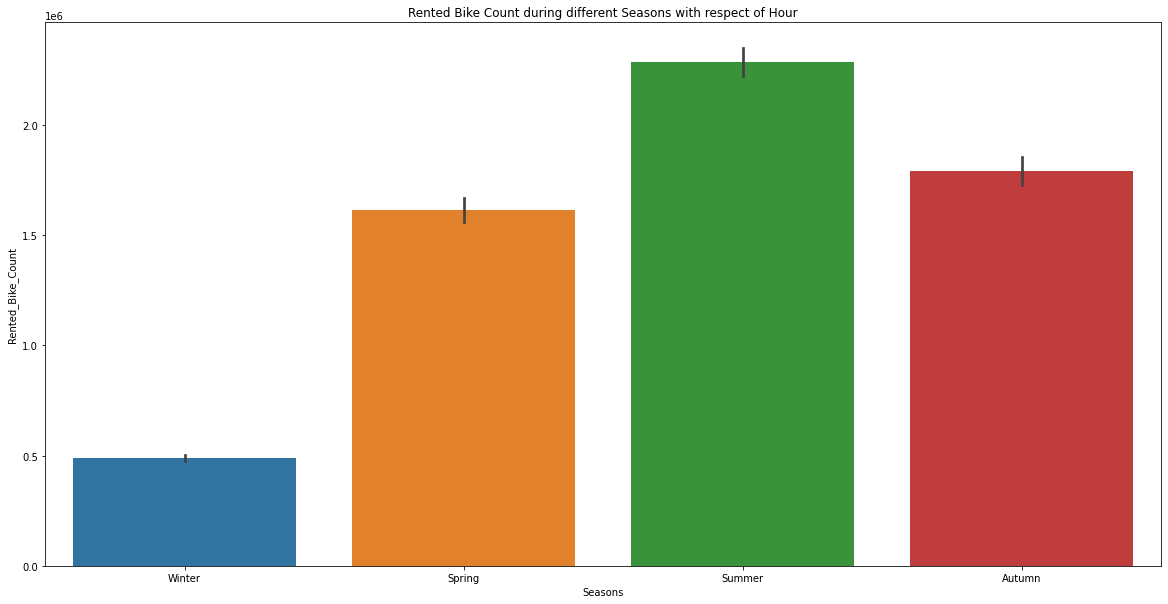

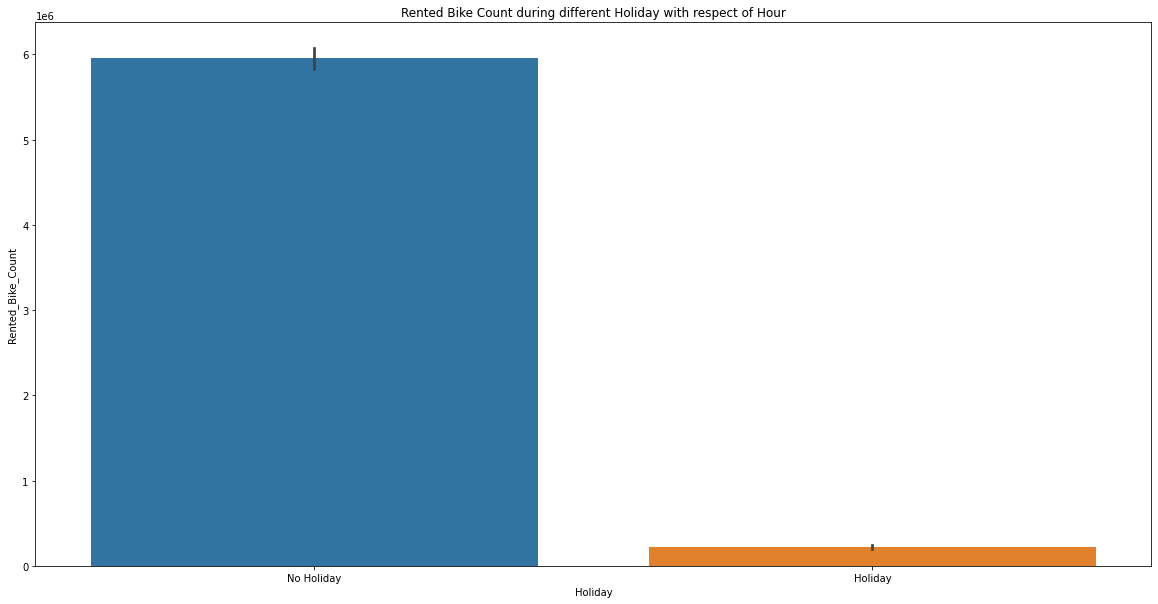

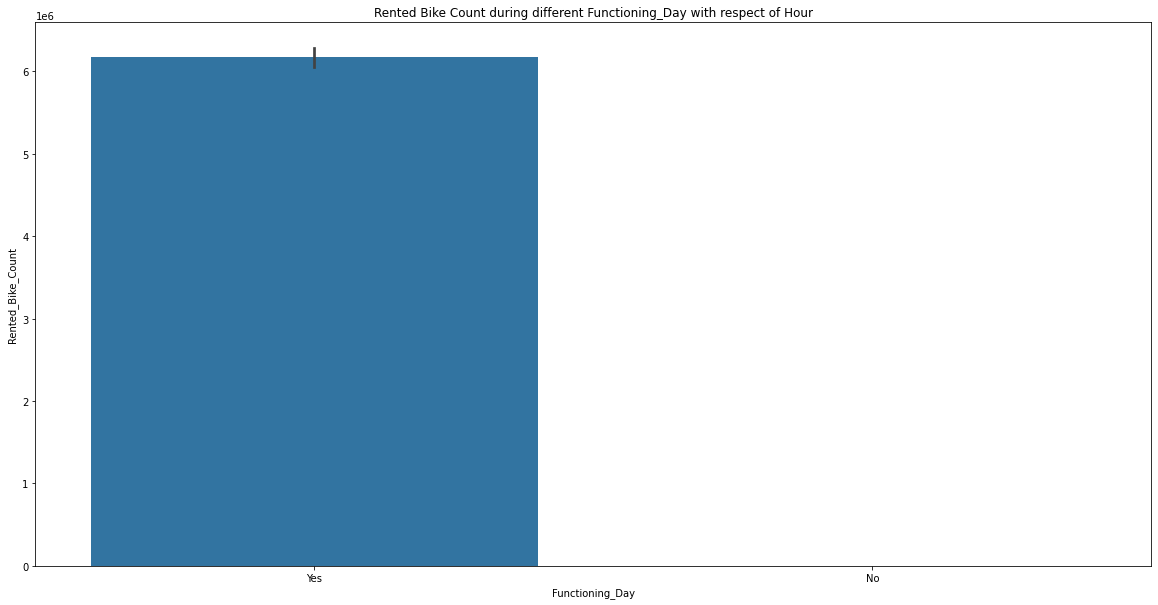

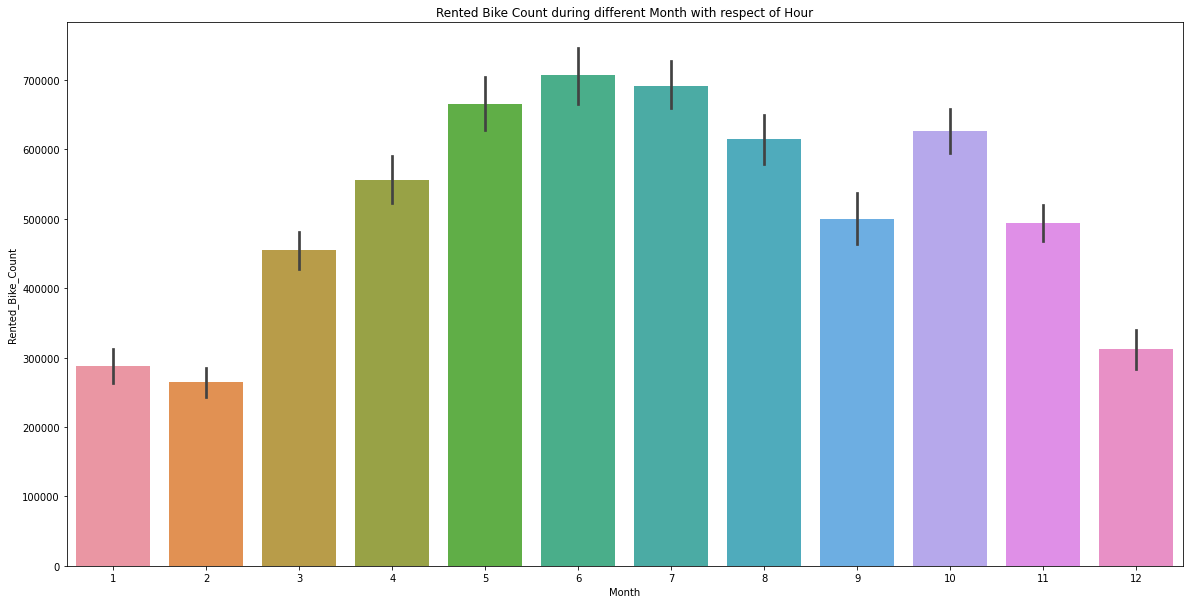

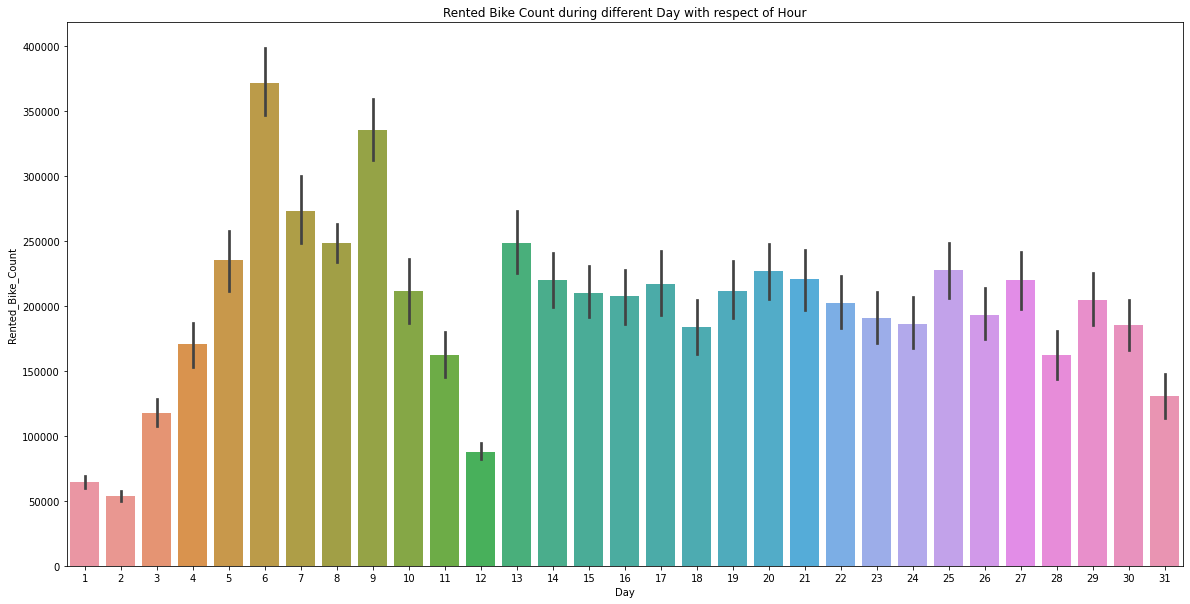

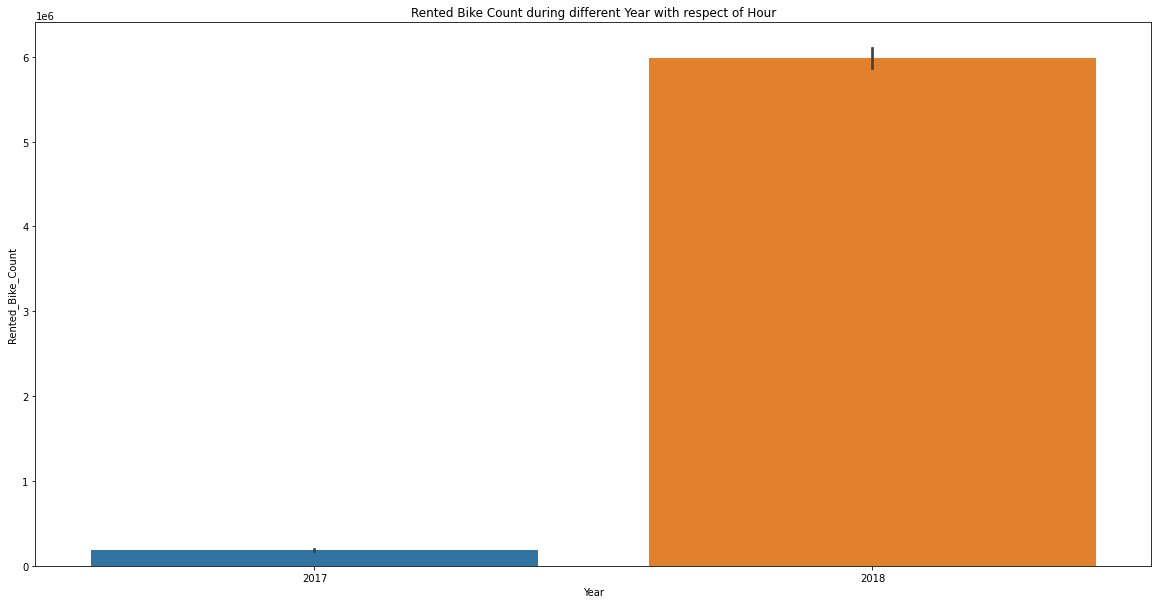

In [175]:
# Chart - 4 visualization code

for i in Categorical[1:]:
  plt.figure(figsize=(20,10))

  sns.barplot(x=Data[i],y=Data['Rented_Bike_Count'],estimator=np.sum)
  plt.title(f"Rented Bike Count during different {i} with respect of Hour")




##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='Temperature', ylabel='Dew_point_temperature'>

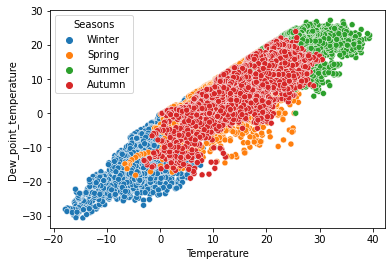

In [176]:
# Chart - 5 visualization code
sns.scatterplot(x=Data['Temperature'],y=Data['Dew_point_temperature'],hue=Data['Seasons'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: xlabel='Temperature', ylabel='Humidity'>

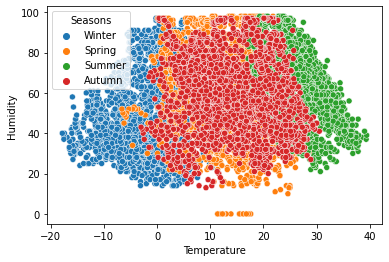

In [177]:
# Chart - 6 visualization code
sns.scatterplot(x=Data['Temperature'],y=Data['Humidity'],hue=Data['Seasons'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Axes: xlabel='Hour', ylabel='Rented_Bike_Count'>

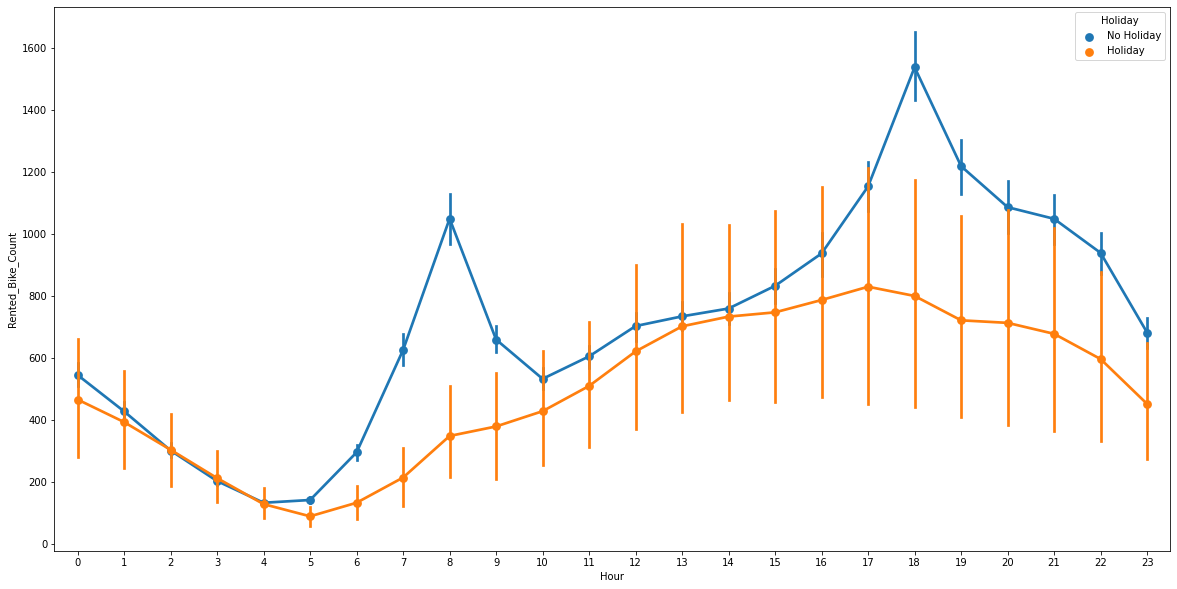

In [178]:
# Chart - 7 visualization code
plt.figure(figsize=(20,10))
sns.pointplot(data=Data,x='Hour',y='Rented_Bike_Count',hue='Holiday')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: xlabel='Hour', ylabel='Rented_Bike_Count'>

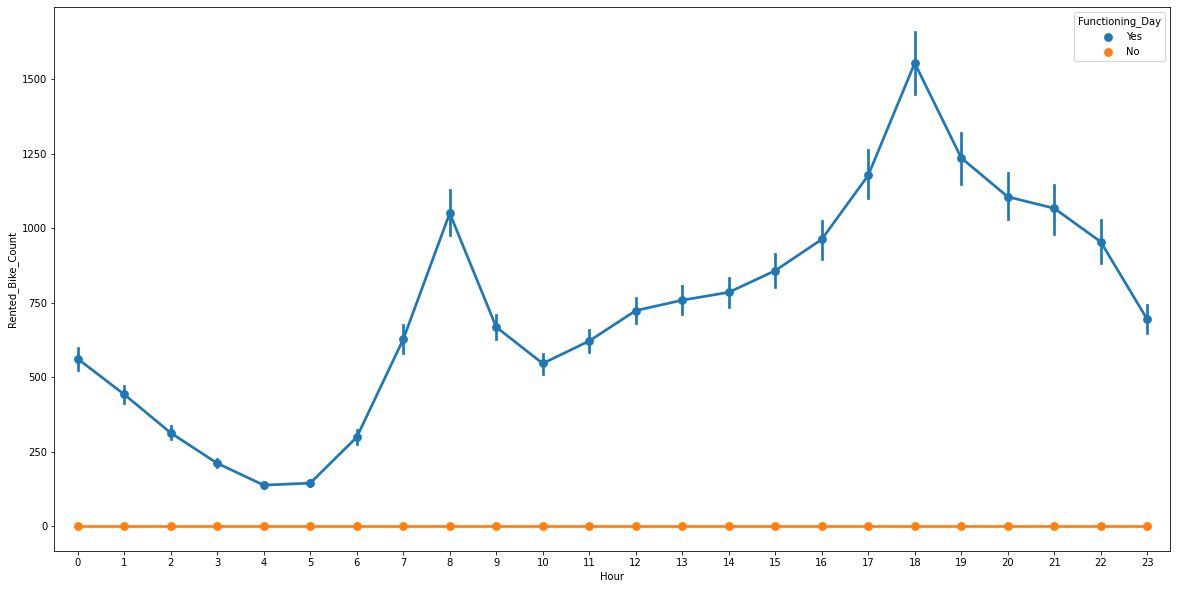

In [179]:
# Chart - 8 visualization code

plt.figure(figsize=(20,10))
sns.pointplot(data=Data,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<Axes: xlabel='Hour', ylabel='Rented_Bike_Count'>

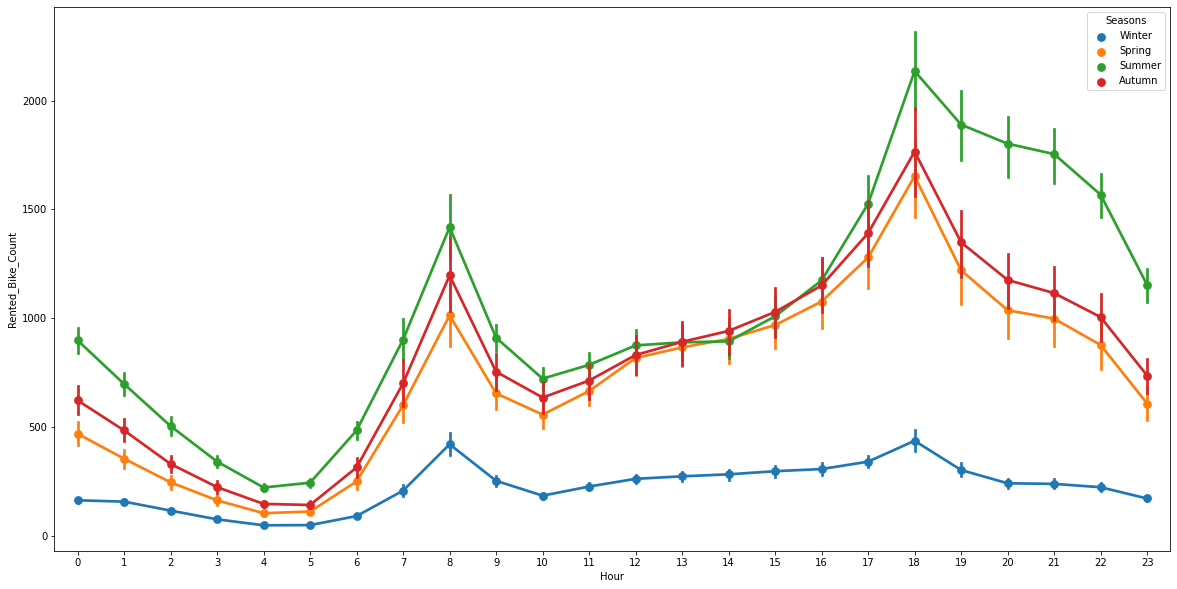

In [180]:
# Chart - 9 visualization code
plt.figure(figsize=(20,10))
sns.pointplot(data=Data,x='Hour',y='Rented_Bike_Count',hue='Seasons')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

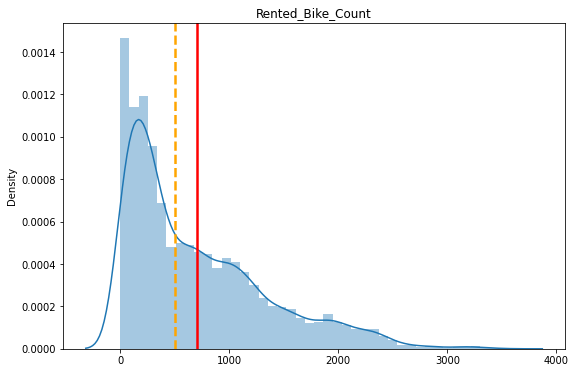

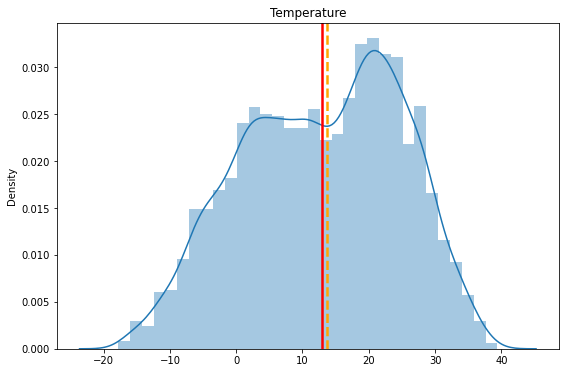

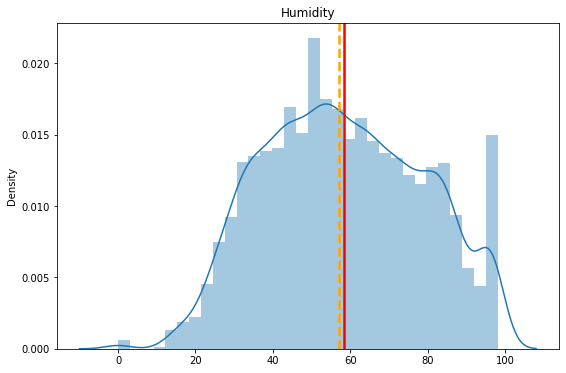

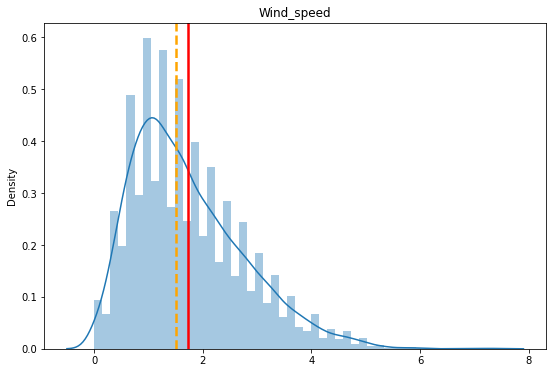

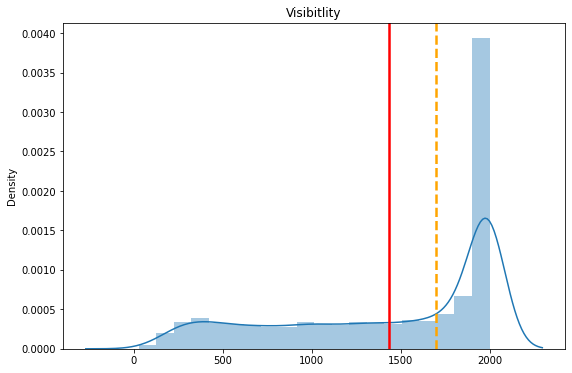

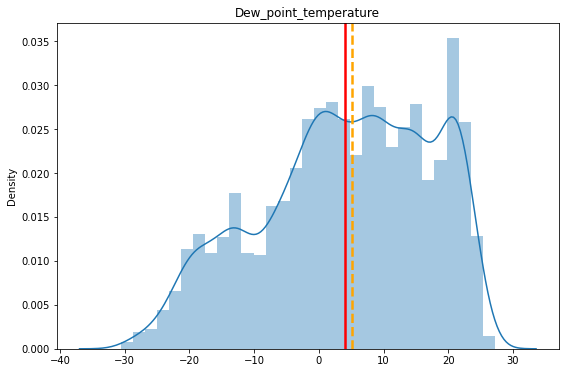

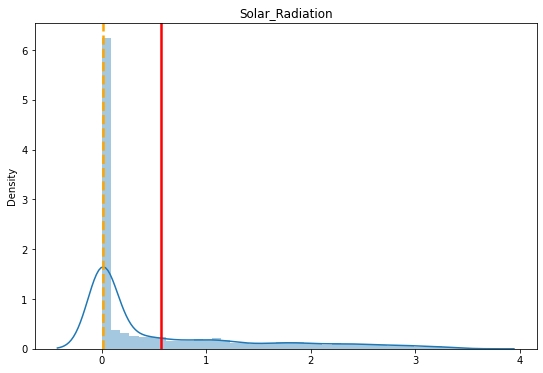

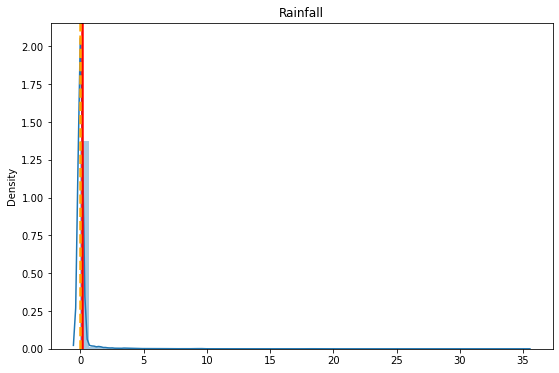

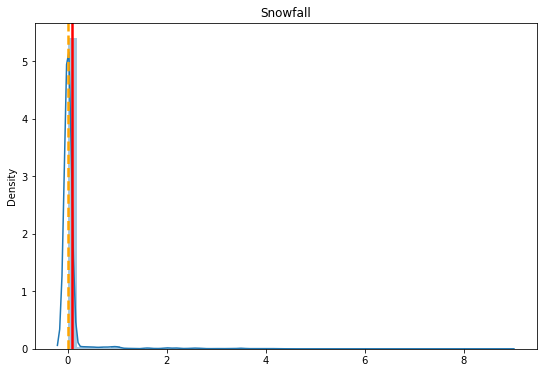

In [181]:
# Chart - 10 visualization code
for col in Continoues:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.distplot(x=Data[col]).set(title=col)
    ax.axvline(x=Data[col].mean(), c='red', ls='-', lw=2.5)
    ax.axvline(x=Data[col].median(), c='orange', ls='--', lw=2.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

<Axes: xlabel='Rainfall', ylabel='Snowfall'>

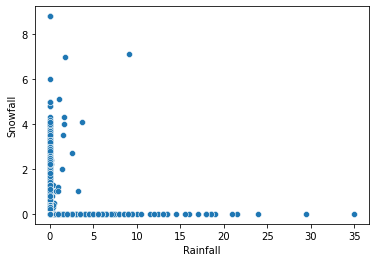

In [182]:
# Chart - 11 visualization code
sns.scatterplot(data=Data,x='Rainfall',y='Snowfall')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<Axes: xlabel='Temperature', ylabel='Solar_Radiation'>

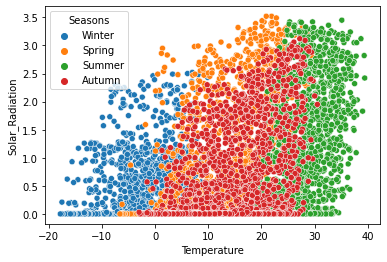

In [183]:
# Chart - 12 visualization code
sns.scatterplot(data=Data,x='Temperature',y='Solar_Radiation',hue='Seasons')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [184]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

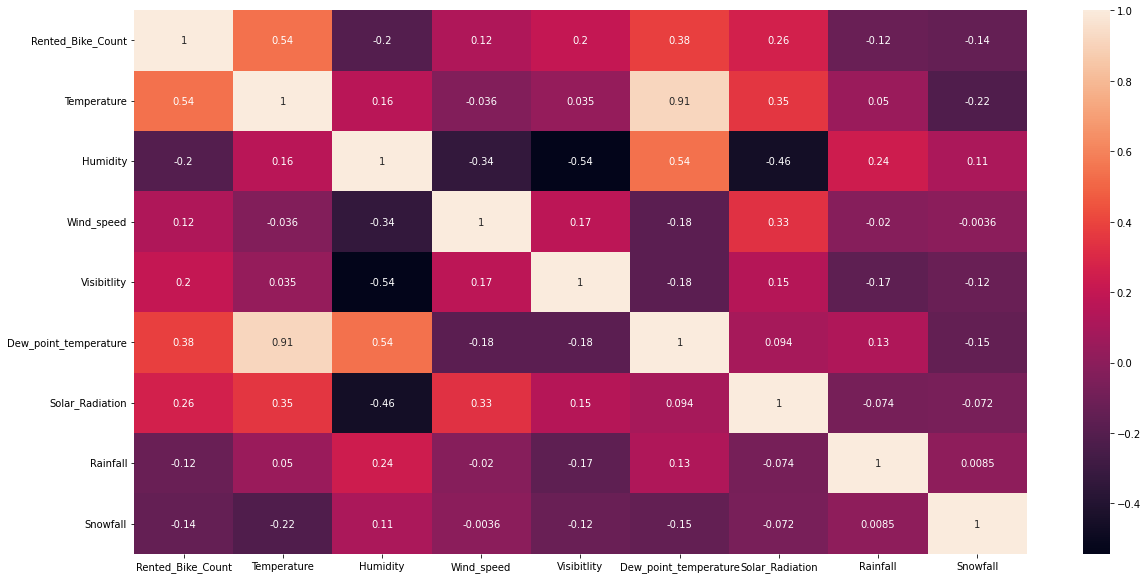

In [185]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(Data[Continoues].corr(),annot=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

<Figure size 1440x720 with 0 Axes>

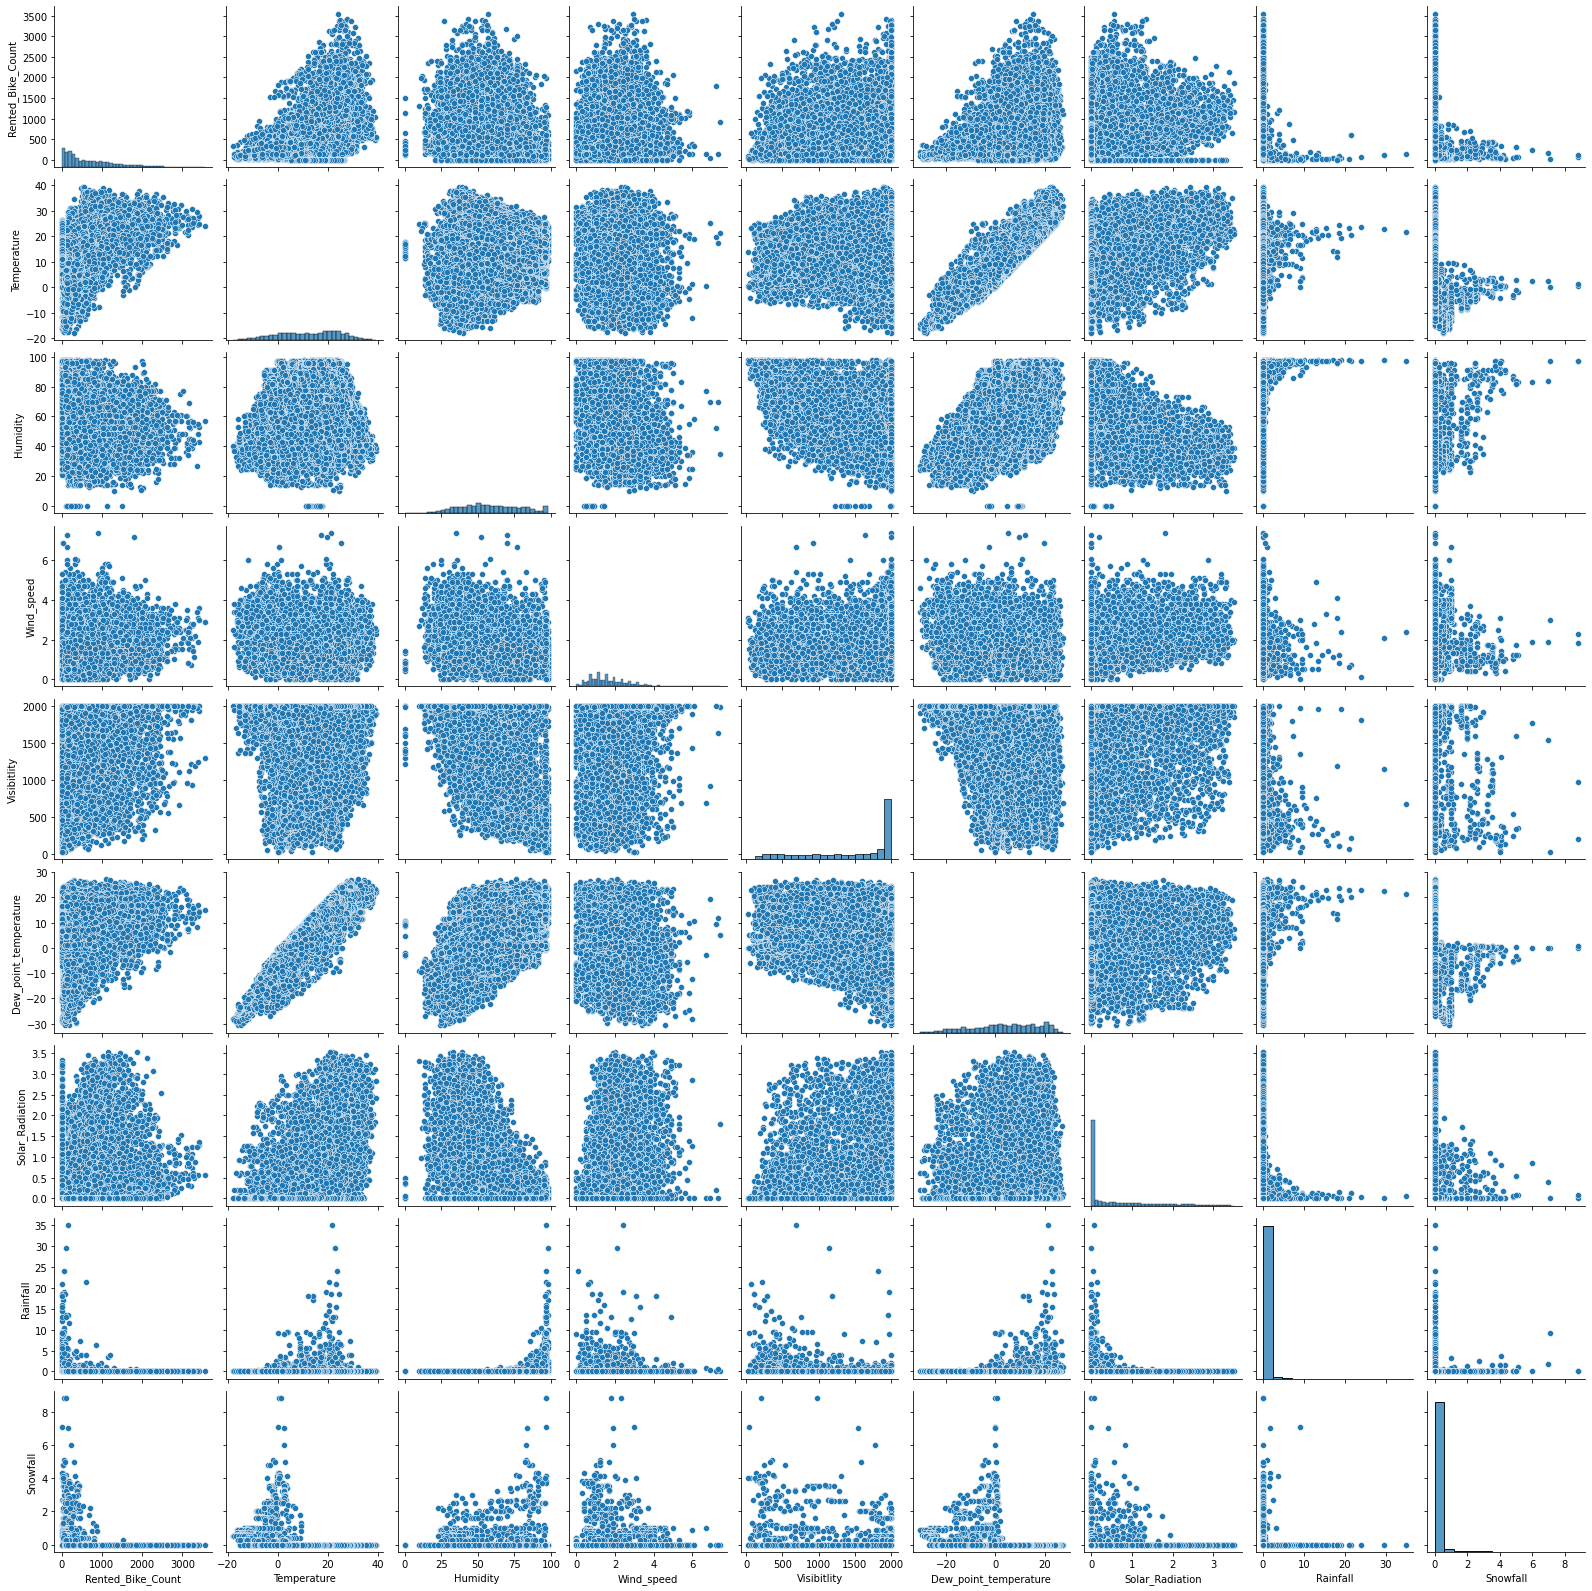

In [186]:
# Pair Plot visualization code
plt.figure(figsize=(20,10))
sns.pairplot(data=Data[Continoues])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis test to determine if the mean bike rental count is significantly different between weekdays and weekends:**

**Null Hypothesis (H0):** There is no significant difference in the mean bike rental count between weekdays and weekends.

**Alternative Hypothesis (HA):** The mean bike rental count is significantly different between weekdays and weekends.



#### 2. Perform an appropriate statistical test.

In [187]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_ind
# 
alpha=0.05
# Convert Date feature type to Datetime

# Create a new column for day of week
Data['weekday'] = Data['Date'].dt.dayofweek

# Split the dataset into weekdays and weekends
weekdays = Data[Data['weekday'] < 5]['Rented_Bike_Count']
weekends = Data[Data['weekday'] >= 5]['Rented_Bike_Count']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(weekdays, weekends)
if p_value<alpha:
  print("We  reject the null hypothesis and conclude that the mean bike rental counts are significantly different between weekdays and weekends.")
else:
  print("We failed to reject the null hypothesis and conclude that there is no significant difference between the means two groups.")
# Print the results

print('T-statistic: ', t_stat)
print('P-value: ', p_value)

We  reject the null hypothesis and conclude that the mean bike rental counts are significantly different between weekdays and weekends.
T-statistic:  3.0205383403487915
P-value:  0.002530536351376408


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis test to determine if there is a significant correlation between temperature and bike rental count:**

**Null Hypothesis (H0)**: There is no significant correlation between temperature and bike rental count.

**Alternative Hypothesis (HA)**: There is a significant correlation between temperature and bike rental count.

#### 2. Perform an appropriate statistical test.

In [188]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(Data['Temperature'], Data['Rented_Bike_Count'])

# Print the results
if p_value < alpha:
    print('Reject Null Hypothesis. There is a significant correlation between temperature and bike rental count.')
else:
    print('Fail to reject Null Hypothesis. There is no significant correlation between temperature and bike rental count.')
print('Correlation coefficient:', corr)
print('P-value:', p_value)

Reject Null Hypothesis. There is a significant correlation between temperature and bike rental count.
Correlation coefficient: 0.5385581530139791
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis test to determine if the mean bike rental count is significantly different between different seasons:**

**Null Hypothesis (H0):** There is no significant difference in the mean bike rental count between different seasons.

**Alternative Hypothesis (HA):** The mean bike rental count is significantly different between different seasons.

#### 2. Perform an appropriate statistical test.

In [189]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway
annova_array=[]
for i in Data['Seasons'].unique():
  annova_array.append(Data[Data['Seasons']==i]['Rented_Bike_Count'])
annova_array
f,p_value=f_oneway(*annova_array)
if p_value < alpha:
    print('Reject Null Hypothesis. The mean bike rental count is significantly different between different seasons.')
else:
    print('Fail to reject Null Hypothesis. The mean bike rental count is not significantly different between different seasons.')


Reject Null Hypothesis. The mean bike rental count is significantly different between different seasons.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [190]:
# Handling Missing Values & Missing Value Imputation
Data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibitlity              0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Day                      0
Month                    0
Year                     0
weekday                  0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

<Axes: >

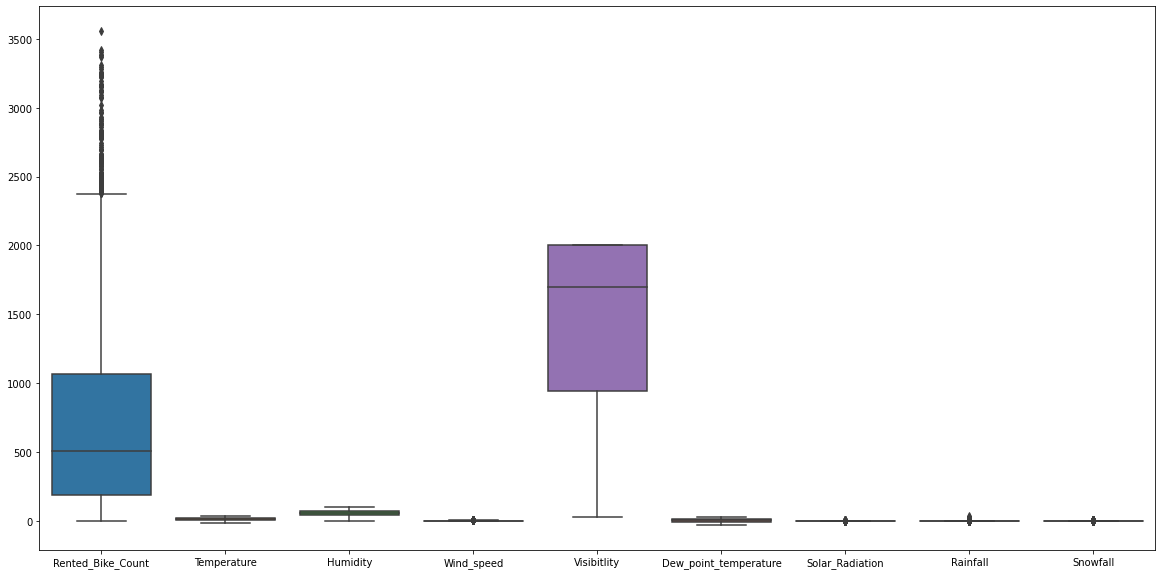

In [191]:
# Handling Outliers & Outlier treatmentsD
plt.figure(figsize=(20,10))
sns.boxplot(data=Data[Continoues])

In [192]:
def outlier_capping(data):
  # calculate the first and third quartiles of the Data
  Q1=np.quantile(data,0.25)
  Q3=np.quantile(data,0.75)
  # calculate the Interquartile range
  Iqr=Q3-Q1
  # calculate the lower and upper bounds for the outliers

  lower_bound=Q1-1.5*Iqr
  upper_bound=Q3+1.5*Iqr

  # Data without outliers
  cleaned_data=[]
  for i in data:
    if i < lower_bound:
      cleaned_data.append(lower_bound)
    elif i > upper_bound:
      cleaned_data.append(upper_bound)
    else:
      cleaned_data.append(i)
  return cleaned_data

Data['Rented_Bike_Count']=outlier_capping(Data['Rented_Bike_Count'])


<Axes: >

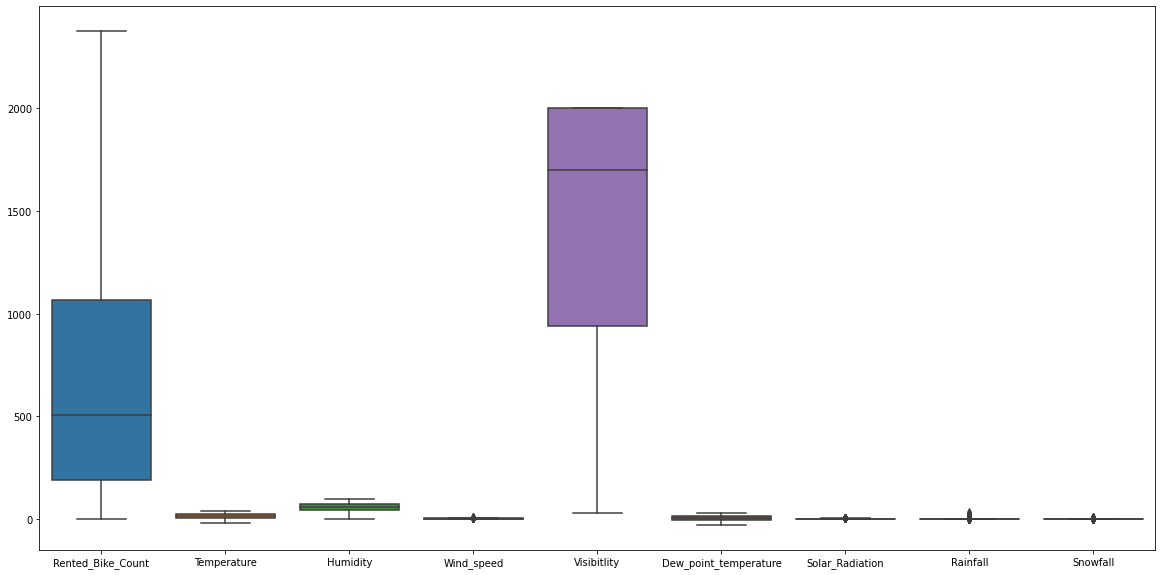

In [193]:
plt.figure(figsize=(20,10))
sns.boxplot(data=Data[Continoues])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [194]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder
# Categorical
# Data=pd.get_dummies(Data,columns=['Seasons'],prefix='Season')
# Data['Holiday']=Data['Holiday'].map({'No Holiday':0,'Holiday':1})
# Data['Functioning_Day']=Data['Functioning_Day'].map({'Yes':0,'No':1})
encoded_data= Data.apply(LabelEncoder().fit_transform)
encoded_data.head()


,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibitlity,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year,weekday
0,0,253,0,111,28,22,1788,114,0,0,0,3,1,1,11,0,0,3
1,0,203,1,108,29,8,1788,114,0,0,0,3,1,1,11,0,0,3
2,0,172,2,103,30,10,1788,113,0,0,0,3,1,1,11,0,0,3
3,0,106,3,101,31,9,1788,114,0,0,0,3,1,1,11,0,0,3
4,0,77,4,103,27,23,1788,104,0,0,0,3,1,1,11,0,0,3


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [195]:
# Expand Contraction

#### 2. Lower Casing

In [196]:
# Lower Casing

#### 3. Removing Punctuations

In [197]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [198]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [199]:
# Remove Stopwords

In [200]:
# Remove White spaces

#### 6. Rephrase Text

In [201]:
# Rephrase Text

#### 7. Tokenization

In [202]:
# Tokenization

#### 8. Text Normalization

In [203]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [204]:
# POS Taging

#### 10. Text Vectorization

In [205]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [206]:
# Manip/ulate Features to minimize feature correlation and create new features
encoded_data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibitlity,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year,weekday
0,0,253,0,111,28,22,1788,114,0,0,0,3,1,1,11,0,0,3
1,0,203,1,108,29,8,1788,114,0,0,0,3,1,1,11,0,0,3
2,0,172,2,103,30,10,1788,113,0,0,0,3,1,1,11,0,0,3
3,0,106,3,101,31,9,1788,114,0,0,0,3,1,1,11,0,0,3
4,0,77,4,103,27,23,1788,104,0,0,0,3,1,1,11,0,0,3


<Axes: >

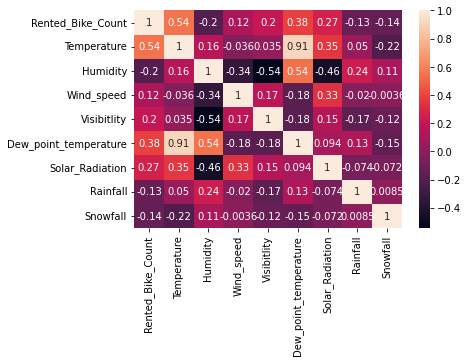

In [207]:

# Let's Drop Date and Dew_point_temperature
encoded_data.drop(columns=['Date','Dew_point_temperature','weekday'],axis=1,inplace=True)
# Continoues.remove('Dew_point_temperature')
sns.heatmap(Data[Continoues].corr(),annot=True)


In [208]:
encoded_data['Rented_Bike_Count']=np.sqrt(encoded_data['Rented_Bike_Count'])
encoded_data['Wind_speed']=np.sqrt(encoded_data['Wind_speed'])

#### 2. Feature Selection

In [209]:
# Select your features wisely to avoid overfitting

#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [210]:
# Calculate_vif(encoded[[i for i in Data.describe().columns if i not in ['Rented_Bike_Count']]])


In [211]:
Calculate_vif(Data[[i for i in Data.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibitlity']]])


,variables,VIF
0,Hour,4.417324
1,Temperature,26.788021
2,Wind_speed,4.833968
3,Dew_point_temperature,11.882414
4,Solar_Radiation,2.735079
5,Rainfall,1.067965
6,Snowfall,1.135869
7,Day,4.322669
8,Month,4.653139
9,Year,17.635086


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [212]:
# Transform Your data
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

result_df=pd.DataFrame()
# def Model(df,scaler):
#     result={'Model_name':'Linear Regression'}
#     X=df.drop('Rented_Bike_Count',axis=1)
#     Y=df['Rented_Bike_Count']
#     X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
#     pipeline=Pipeline([('scaler',scaler),('linear',LinearRegression())])
#     pipeline.fit(X_train,Y_train)
#     y_predict_test=pipeline.predict(X_test)
#     y_predict_train=pipeline.predict(X_train)
#     print(mean_absolute_error(y_train,y_predict_train))
#     # result['MAE_training']=mean_absolute_error(y_train,y_predict_train)
#     # result['MSE_training']=mean_squared_error(y_train,y_predict_train)
#     # result['RMSE_training']=np.sqrt(mean_absolute_error(y_train,y_predict_train))
#     # result['R2_Score_training']=r2_score(y_train,y_predict_train)

#     # result['MAE_testing']=mean_absolute_error(y_test,y_predict_test)
#     # result['MSE_testing']=mean_squared_error(y_test,y_predict_test)
#     # result['RMSE_testing']=np.sqrt(mean_absolute_error(y_test,y_predict_test))
#     # result['R2_Score_testing']=r2_score(y_test,y_predict_test)
#     # print(result)
#     return result

  



    




### 6. Data Scaling

In [213]:
# Scaling your data
X=encoded_data.drop(['Rented_Bike_Count'],axis=1)
Y=encoded_data['Rented_Bike_Count']
X.head()

,Hour,Temperature,Humidity,Wind_speed,Visibitlity,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year
0,0,111,28,4.690416,1788,0,0,0,3,1,1,11,0,0
1,1,108,29,2.828427,1788,0,0,0,3,1,1,11,0,0
2,2,103,30,3.162278,1788,0,0,0,3,1,1,11,0,0
3,3,101,31,3.000000,1788,0,0,0,3,1,1,11,0,0
4,4,103,27,4.795832,1788,0,0,0,3,1,1,11,0,0


### 7. Dimesionality Reduction

### 8. Data Splitting

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [214]:
# DImensionality Reduction (If needed)

##### Which method have you used to scale you data and why?

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

In [215]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [216]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [218]:
# ML Model - 1 Implementation
# 
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100)

# Fit the Algorithm
rf.fit(X_train,Y_train)

# Predict on the model
y_predict_train=rf.predict(X_train)
y_predict_test=rf.predict(X_test)

MAE= mean_absolute_error(y_predict_train,Y_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_predict_train,Y_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_predict_train,Y_train)  
print(f"The R2 Score is {R2}.")

print(rf.score(X_train,Y_train))
print(rf.score(X_test,Y_test))


The Mean Absolute Error (MAE) is 0.8669779014734539.
The Mean Squred Error(MSE) is 1.757435610747117.
The Root Mean Squared Error(RMSE) is 1.3256830732671807.
The R2 Score is 0.9865820090107236.
0.9873747654114502
0.9097275062421726


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

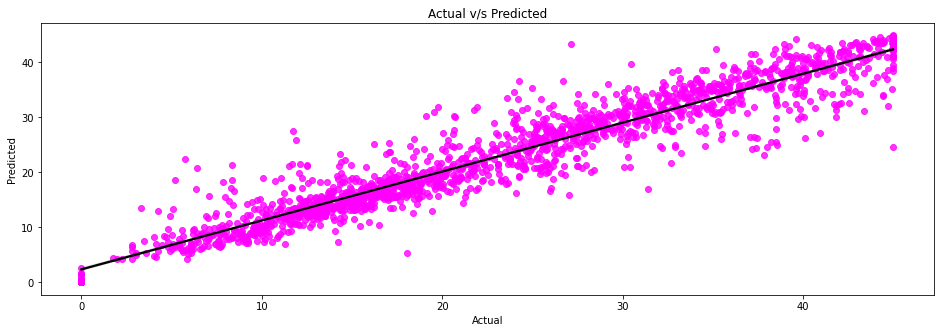

In [219]:
# Visualizing evaluation Metric Score chart
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")


plot_scatter(y_predict_test,Y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [220]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}
rf_reg=RandomForestRegressor()
rf_tuning=GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,Y_train)
rf_tuning.best_params_

# Fit the Algorithm

# Predict on the model

{'max_depth': 9, 'n_estimators': 80}

The Mean Absolute Error (MAE) is 2.368786701599454.
The Mean Squred Error(MSE) is 11.342572638763677.
The Root Mean Squared Error(RMSE) is 3.3678736078961866.
The R2 Score is 0.9058047373627632.
0.9185161382150556
0.8855132823751518


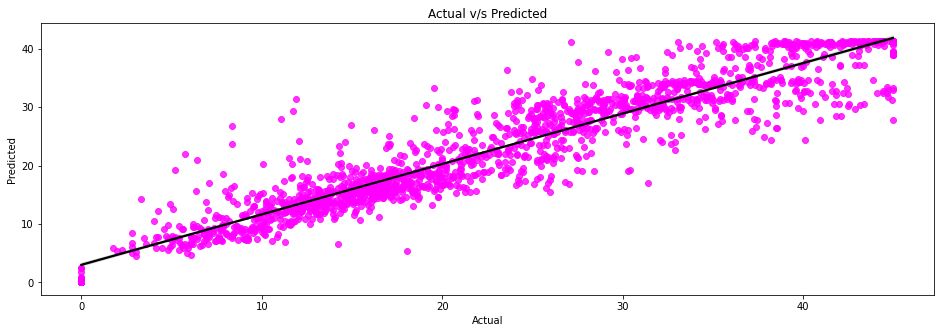

In [222]:

rf_tunned=RandomForestRegressor(n_estimators=80,max_depth=9,criterion='friedman_mse')

# Fit the Algorithm
rf_tunned.fit(X_train,Y_train)
# Predict on the model
y_predict_train=rf_tunned.predict(X_train)
y_predict_test=rf_tunned.predict(X_test)

MAE= mean_absolute_error(y_predict_train,Y_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_predict_train,Y_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_predict_train,Y_train)  
print(f"The R2 Score is {R2}.")

print(rf_tunned.score(X_train,Y_train))
print(rf_tunned.score(X_test,Y_test))
plot_scatter(y_predict_test,Y_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [223]:
# Visualizing evaluation Metric Score chart
from sklearn.tree import DecisionTreeRegressor

# create an object
D_tree=DecisionTreeRegressor(max_depth=5)
# lasso_reg=Lasso(alpha=0.01)
D_tree.fit(X_train,Y_train)

y_predict_train=D_tree.predict(X_train)
y_predict_test=D_tree.predict(X_test)

MAE= mean_absolute_error(y_predict_train,Y_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_predict_train,Y_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_predict_train,Y_train)  
print(f"The R2 Score is {R2}.")

print(D_tree.score(X_train,Y_train))
print(D_tree.score(X_test,Y_test))


The Mean Absolute Error (MAE) is 3.9496710741722008.
The Mean Squred Error(MSE) is 29.21623559344236.
The Root Mean Squared Error(RMSE) is 5.405204491362224.
The R2 Score is 0.7343592160621715.
0.7901136030783299
0.7738636465204212


#### 2. Cross- Validation & Hyperparameter Tuning

In [224]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection  import GridSearchCV

tree=DecisionTreeRegressor()
parameters={
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,None],
           "max_features":["auto","log2"] }
# Fit the Algorithm
tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,Y_train)
# Predict on the model
tuning_model.best_estimator_

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [225]:
# Visualizing evaluation Metric Score chart
from sklearn.tree import DecisionTreeRegressor

# create an object
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto',criterion='friedman_mse')
# lasso_reg=Lasso(alpha=0.01)
D_tree.fit(X_train,Y_train)

y_predict_train=D_tree.predict(X_train)
y_predict_test=D_tree.predict(X_test)

MAE= mean_absolute_error(y_predict_train,Y_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_predict_train,Y_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_predict_train,Y_train)  
print(f"The R2 Score is {R2}.")

print(D_tree.score(X_train,Y_train))
print(D_tree.score(X_test,Y_test))


The Mean Absolute Error (MAE) is 2.530195695604989.
The Mean Squred Error(MSE) is 13.595992605248812.
The Root Mean Squared Error(RMSE) is 3.6872744141504863.
The R2 Score is 0.8917553066714852.
0.9023278036158141
0.8465673405955771


Text(0.5, 0, 'Relative Importance')

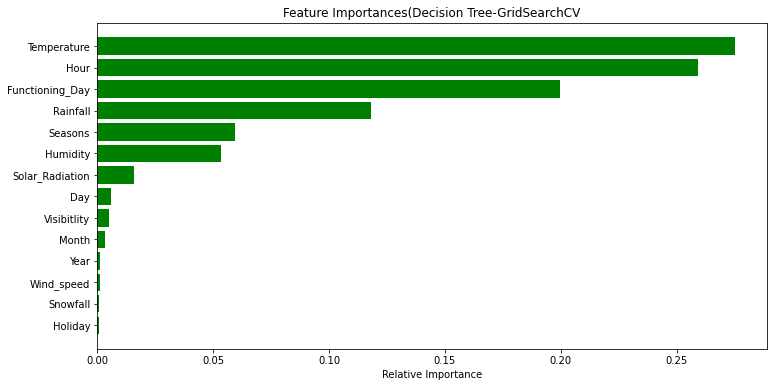

In [226]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [227]:
# ML Model - 3 Implementation

from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()

# Fit the Algorithm
gradboo_reg.fit(X_train,Y_train)

# Predict on the model
y_predict_train=gradboo_reg.predict(X_train)
y_predict_test=gradboo_reg.predict(X_test)





#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [228]:
# Visualizing evaluation Metric Score chart
MAE= mean_absolute_error(y_predict_train,Y_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_predict_train,Y_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_predict_train,Y_train)  
print(f"The R2 Score is {R2}.")

print(gradboo_reg.score(X_train,Y_train))
print(gradboo_reg.score(X_test,Y_test))

The Mean Absolute Error (MAE) is 2.7854173915913036.
The Mean Squred Error(MSE) is 14.849326962206076.
The Root Mean Squared Error(RMSE) is 3.853482446074729.
The R2 Score is 0.8693453801039692.
0.8933239799890994
0.8777081655073176


#### 2. Cross- Validation & Hyperparameter Tuning

In [229]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
gbr=GradientBoostingRegressor()
     

parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,80,100,150],
                  'max_depth'    : [4,6,8,10]
                 }

# Fit the Algorithm
grad_boo_tuning=GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
# fitting gridsearc on xtrain and ytrain
grad_boo_tuning.fit(X_train,Y_train)
grad_boo_tuning.best_params_


# Predict on the model4


{'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.5}

In [230]:
gbr_tunned=GradientBoostingRegressor(learning_rate= 0.04, max_depth= 10, n_estimators=150, subsample= 0.5,criterion='friedman_mse')
gbr_tunned.fit(X_train,Y_train)
y_predict_train=gbr_tunned.predict(X_train)
y_predict_test=gbr_tunned.predict(X_test)
MAE= mean_absolute_error(y_predict_train,Y_train)

print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_predict_train,Y_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_predict_train,Y_train)  
print(f"The R2 Score is {R2}.")

print(gbr_tunned.score(X_train,Y_train))
print(gbr_tunned.score(X_test,Y_test))


The Mean Absolute Error (MAE) is 0.9829473027134626.
The Mean Squred Error(MSE) is 1.7748608047662904.
The Root Mean Squared Error(RMSE) is 1.3322390193828924.
The R2 Score is 0.986488632829267.
0.9872495846304886
0.9185749439655047


Text(0.5, 0, 'Relative Importance')

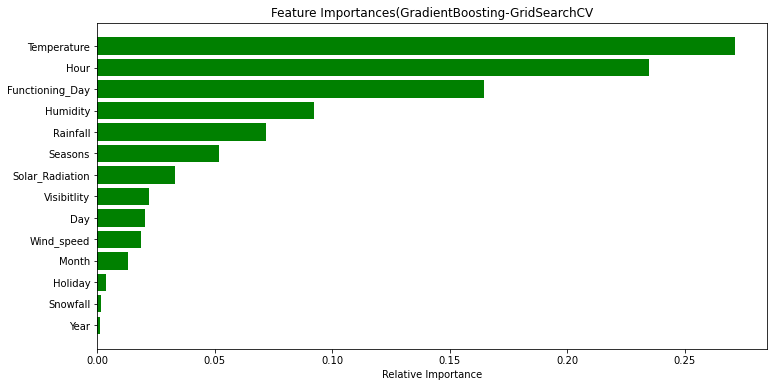

In [231]:
imp_variables=X.columns
importances = gbr_tunned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(GradientBoosting-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

In [246]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([3, 6, 9, 12]).reshape((-1, 1))
Y = np.array([25, 85, 168, 205])

model = LinearRegression().fit(X, Y)

# Predict the value of Y for X = 24
X_new = np.array([24]).reshape((-1, 1))
Y_new = model.predict(X_new)

print(Y_new)


[463.4]


In [242]:
X=df.drop('Y',axis=1)
Y=df['Y']
le=LinearRegression()
le.fit(X,Y)

LinearRegression()

In [245]:
df['Predict']=24
le.predict(df['Predict'])

ValueError: ignored